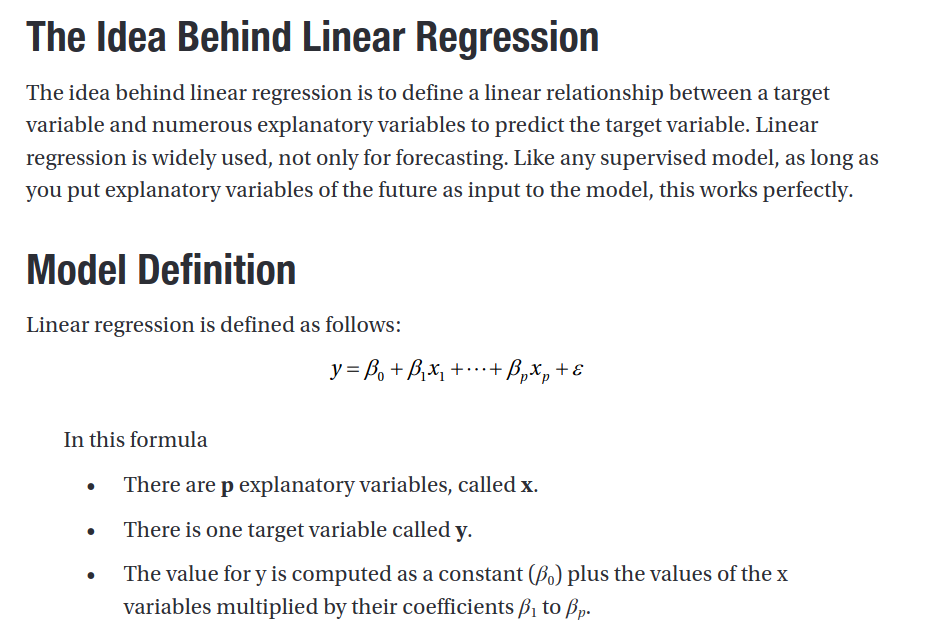

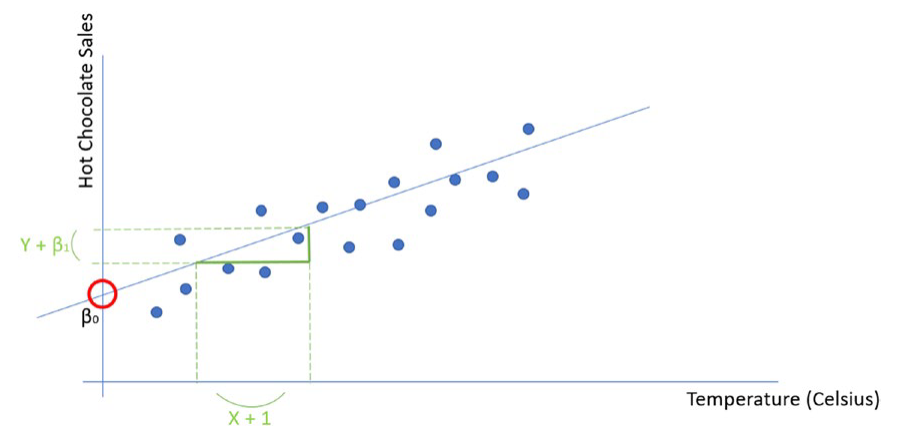

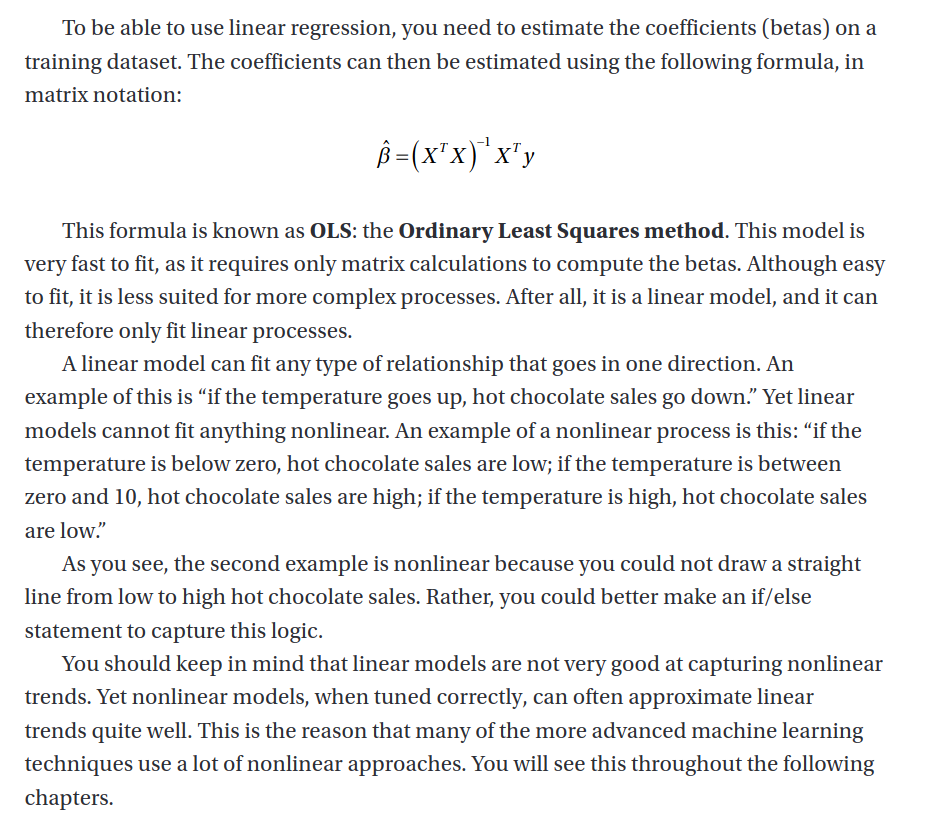

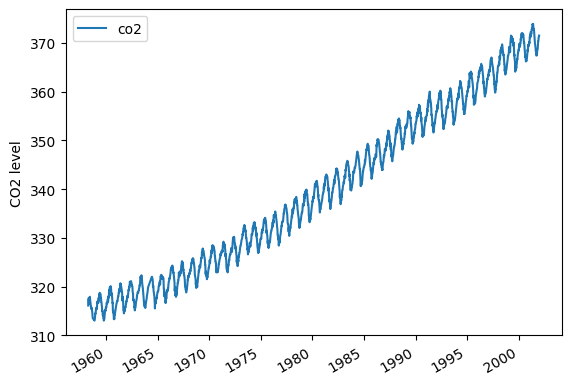

In [ ]:
#Importing the data and plotting it

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

data = sm.datasets.co2.load_pandas()
co2 = data.data
co2 = co2.dropna()
ax = co2.plot()
ax.set_ylabel('CO2 level')
plt.show()

## Now, you only have the dates and the CO 2 values. The interesting step here is to do feature engineering: creating additional variables, based on the original variables. Even though there is very little information in this dataset, there are a lot of variables that you can create from it. Let’s start by extracting seasonal variables from the date variable. As we can see from the plot, there is a strong seasonal pattern going on. You could try to capture this by adding a monthly seasonality to the model. For this, it is necessary to create a variable month in your dataset

In [ ]:
# Creating the variable month

co2['month'] = [x.month for x in co2.index]



<ipython-input-3-fb7399b33996>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['month'] = [x.month for x in co2.index]


## Now that you have this variable for monthly seasonality, let’s see whether you can create a variable that captures the long-term upward trend. The solution to this problem is to add a variable year, by extracting the year from the date variable. As there is a yearly increase in the data, the trend effect could be captured by this variable

In [ ]:
#Creating the variable year

co2['year'] = [x.year for x in co2.index]

<ipython-input-4-66a825de10de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['year'] = [x.year for x in co2.index]


## Now for starters, let’s just try to fit a linear regression with only those two explanatory variables month and year. The package scikit-learn, which you have seen before, contains a large number of supervised models and will be used for this exercise.

0.9690528910892225 0.34332512339527643


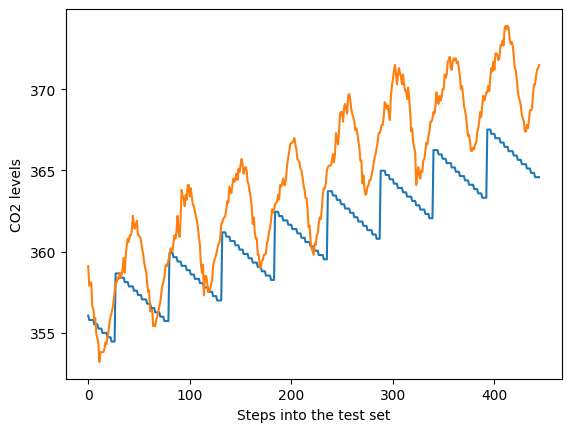

In [ ]:
#Fitting a Linear Regression with two variables



# Create X and y objects
X = co2[['year', 'month']]
y = co2['co2']

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345,shuffle=False)

# Fit model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()



## The train R2 of this model is 0.96, which is great. The test R2, however, is 0.34, which is relatively bad

## The next thing that you will add to the model is an autoregressive component. This will be done by feature engineering. As always in supervised models, you need to extract any information as explanatory variables. For this example, let’s see how to use the shift method to create a lagged variable. You can, for example, add five lagged variables easily

In [ ]:
#Adding lagged variables into the data

co2['co2_l1'] = co2['co2'].shift(1)
co2['co2_l2'] = co2['co2'].shift(2)
co2['co2_l3'] = co2['co2'].shift(3)
co2['co2_l4'] = co2['co2'].shift(4)
co2['co2_l5'] = co2['co2'].shift(5)

<ipython-input-6-0f83c0189360>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['co2_l1'] = co2['co2'].shift(1)
<ipython-input-6-0f83c0189360>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['co2_l2'] = co2['co2'].shift(2)
<ipython-input-6-0f83c0189360>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
#Drop missing values

co2 = co2.dropna()



## As a final step, let’s fit and evaluate the model with the monthly seasonality, the yearly trend, and the five autoregressive lagged variables. You must note here that, since we added the lagged values into the train set, it would be impossible to do this for multiple steps forward. You calculate the first future value using the data of today. You calculate the second future value by using the data of tomorrow. Therefore, the error that you evaluate here should be interpreted as a one-step forecasting error, whereas the previous code block did a multistep forecast

0.998797756425323 0.9904370120462797


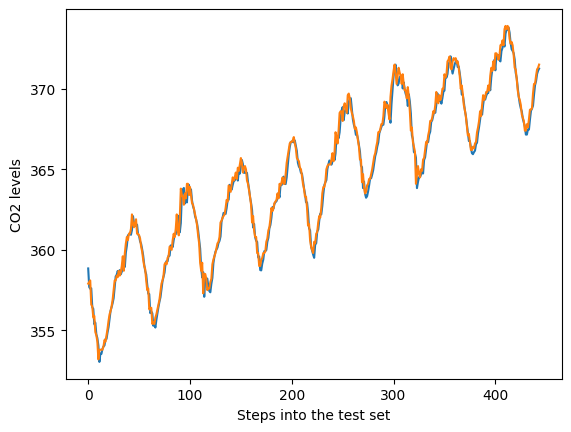

In [ ]:
#Fitting the full Linear Regression model

# Create X and y objects
X = co2[['year', 'month', 'co2_l1', 'co2_l2', 'co2_l3', 'co2_l4', 'co2_l5']]
y = co2['co2']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345,shuffle=False)

# Fit the model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()

## The R2 train score of this model is **0.998**, and the test R2 score is **0.990.** This is a great performance! You can see in the plot that the predictions follow the actual values almost perfectly.